In [6]:
# importing `config.py` to access its variables and other needed dependensies
import config
from tweepy import Client
import tweepy
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer


In [7]:
#connecting to the twitter API
client = Client(config.bearer_token)

In [10]:
#getting recent tweets data

#asking for the search term and the number of tweets
keyword = input('insert search term : ')
query = f'{keyword} -is:retweet lang:en'
num_tweets = int(input('how many tweets do you want? '))

#using client to make a call and to the twitter api
tweets = []
                                  
for response in tweepy.Paginator(client.search_recent_tweets,
                                query = query,
                                user_fields = ['username', 'public_metrics', 'description', 'location'],
                                tweet_fields = ['id','created_at', 'public_metrics', 'text', 'source'],
                                expansions = 'author_id',
                                max_results = 100):
    tweets.append(response)

insert search term : lebanon
how many tweets do you want? 300


KeyboardInterrupt: 

In [24]:
def tweetsETL(tweets):
    
    def cleanTweets(tweet):
        clean_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
        return clean_text
    
    result = []
    user_dict = {}
    for tweet in tweets:
        for user in response.includes['users']:
            user_dict[user.id] = {'username': user.username, 
                              'followers': user.public_metrics['followers_count'],
                              'tweets': user.public_metrics['tweet_count'],
                              'description': user.description,
                              'location': user.location
                             }
        for tweet in response.data:
            author_info = user_dict[tweet.author_id]
            result.append({'author_id': tweet.author_id, 
                       'username': author_info['username'],
                       'author_followers': author_info['followers'],
                       'author_tweets': author_info['tweets'],
                       'author_description': author_info['description'],
                       'author_location': author_info['location'],
                       'id': tweet.id,
                       'text': tweet.text,
                       'clean_tweet' : cleanTweets(tweet.text),
                       'created_at': tweet.created_at,
                       'source':tweet.source,
                       'retweets': tweet.public_metrics['retweet_count'],
                       'replies': tweet.public_metrics['reply_count'],
                       'likes': tweet.public_metrics['like_count'],
                       'quote_count': tweet.public_metrics['quote_count']
                      })

    df = pd.DataFrame(result)
    return df

In [25]:
df = tweetsETL(tweets)

In [29]:
df

,author_id,username,author_followers,author_tweets,author_description,author_location,id,text,clean_tweet,created_at,source,retweets,replies,likes,quote_count
0,1361768369100181506,Internl_Leaks,3490,17154,Geopolitics - Foreign Policy - International ...,World,1451644123656556544,#BREAKING Hezbollah Chief\nNasrallah: The west...,BREAKING Hezbollah Chief Nasrallah The west is...,2021-10-22 20:18:23+00:00,Twitter for Android,1,0,1,0
1,1361768369100181506,Internl_Leaks,3490,17154,Geopolitics - Foreign Policy - International ...,World,1451643990743269376,#BREAKING Hezbollah Chief Nasrallah: Let's go ...,BREAKING Hezbollah Chief Nasrallah Let s go to...,2021-10-22 20:17:52+00:00,Twitter for Android,1,0,0,0
2,63980569,AcrossTheBay,8772,30396,With Jazz and conversation | (Opinions are min...,From the foot of Mt. Belzoni,1451643694478680068,"@thejpc What is equally grotesque, of course, ...",What is equally grotesque of course is that hi...,2021-10-22 20:16:41+00:00,Twitter for Android,0,0,2,0
3,1265962185689350144,cursy11,10,344,osu top #450 on turkey,None,1451643665668050944,@plankwastaken Bro share yourself u live in Le...,Bro share yourself u live in Lebanon lol,2021-10-22 20:16:34+00:00,Twitter for Android,0,1,1,0
4,1184938880,Nabilah29937,0,477,🏆🏈🇺🇸 High School Football Stream 2021\nLive Br...,texas usa,1451643341167161344,2021 Boys Varsity Football Live Broadcast\nPle...,2021 Boys Varsity Football Live Broadcast Plea...,2021-10-22 20:15:17+00:00,Twitter Web App,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13595,62349924,iosbakerjoe,1593,13535,SEIU Local 73 for 30 years. Raided by FBI & su...,Chicago,1451631721833717770,More victims of the #Zionist regime - this tim...,More victims of the Zionist regime this time a...,2021-10-22 19:29:07+00:00,Twitter for iPhone,0,0,1,0
13596,2617310179,roni_ainar,31,5420,کیف ما رحت وبرمت ولفیت حول العالم ✈ راح تبقی ل...,"New Lebanon, OH",1451631579420299269,😍😍 Good evening\n#CatsOnTwitter \n#CatsofTwitt...,Good evening CatsOnTwitter CatsofTwittter Lebanon,2021-10-22 19:28:33+00:00,Twitter for Android,0,0,1,0
13597,3188209724,ScotsAth,1197,2103,,"Coppell, TX",1451631409051885569,Our #1 ranked Scots tennis team defeated #2 ra...,Our 1 ranked Scots tennis team defeated 2 rank...,2021-10-22 19:27:52+00:00,Twitter for iPhone,2,2,32,1
13598,1422159365335826434,Marwa658772781,0,381,.,None,1451631294778073099,@AnitaOakville @JustinTrudeau @PfizerCA My nam...,My name is Marwa a mother of 4 children from S...,2021-10-22 19:27:25+00:00,Twitter for Android,0,0,1,0


In [26]:
#Creating the wordcloud function
def creatWordCloud(df,clm_name):
    text = " ".join(line for line in df[clm_name])
    # Create the wordcloud object
    wordcloud = WordCloud(width=980, height=580, margin=0,collocations = False, background_color = 'white').generate(text)
    # Display the generated image:
    plt.figure(figsize=(15,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()
    return plt


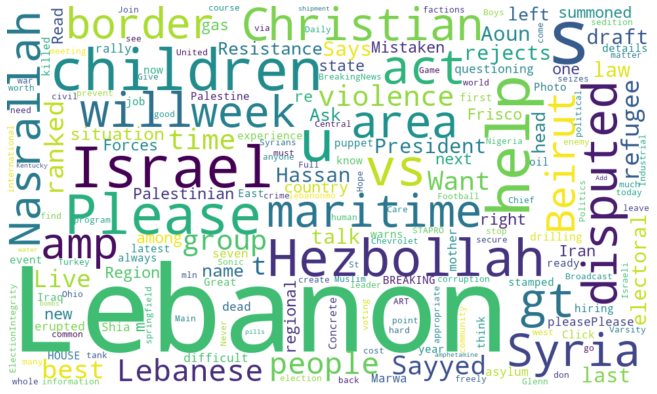

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [27]:
creatWordCloud(df,'clean_tweet')

In [30]:
def sentimentAnalysis(df,clm_name):
    tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
    model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
    classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
    res = df[clm_name].apply(lambda x: classifier(x[:512]))
    return res

In [31]:
def sentimentToDf(df,z):
    tweets_stars = []
    tweets_scores = []
    tweets_sentiment = []
    for i in range(z.size):
        tweets_stars.append(int(float(z[i][0]['label'].split()[0])))
        tweets_scores.append(z[i][0]['score'])
        if z[i][0]['label'] == '4 stars' or z[i][0]['label'] == '5 stars':
            tweets_sentiment.append('positive')
        elif z[i][0]['label'] == '1 star' or z[i][0]['label'] == '2 stars':
            tweets_sentiment.append('negative')
        else :
            tweets_sentiment.append('neutral')
    df['scores'] = tweets_scores
    df['sentiment'] = tweets_sentiment  
    df['stars'] = tweets_stars

In [32]:
sentimentToDf(df,sentimentAnalysis(df,'clean_tweet'))

In [35]:
df.to_csv("lebanon_sntmnt.csv")

In [36]:
df

,author_id,username,author_followers,author_tweets,author_description,author_location,id,text,clean_tweet,created_at,source,retweets,replies,likes,quote_count,scores,sentiment,stars
0,1361768369100181506,Internl_Leaks,3490,17154,Geopolitics - Foreign Policy - International ...,World,1451644123656556544,#BREAKING Hezbollah Chief\nNasrallah: The west...,BREAKING Hezbollah Chief Nasrallah The west is...,2021-10-22 20:18:23+00:00,Twitter for Android,1,0,1,0,0.765113,negative,1
1,1361768369100181506,Internl_Leaks,3490,17154,Geopolitics - Foreign Policy - International ...,World,1451643990743269376,#BREAKING Hezbollah Chief Nasrallah: Let's go ...,BREAKING Hezbollah Chief Nasrallah Let s go to...,2021-10-22 20:17:52+00:00,Twitter for Android,1,0,0,0,0.654640,negative,1
2,63980569,AcrossTheBay,8772,30396,With Jazz and conversation | (Opinions are min...,From the foot of Mt. Belzoni,1451643694478680068,"@thejpc What is equally grotesque, of course, ...",What is equally grotesque of course is that hi...,2021-10-22 20:16:41+00:00,Twitter for Android,0,0,2,0,0.452659,negative,1
3,1265962185689350144,cursy11,10,344,osu top #450 on turkey,None,1451643665668050944,@plankwastaken Bro share yourself u live in Le...,Bro share yourself u live in Lebanon lol,2021-10-22 20:16:34+00:00,Twitter for Android,0,1,1,0,0.501982,positive,5
4,1184938880,Nabilah29937,0,477,🏆🏈🇺🇸 High School Football Stream 2021\nLive Br...,texas usa,1451643341167161344,2021 Boys Varsity Football Live Broadcast\nPle...,2021 Boys Varsity Football Live Broadcast Plea...,2021-10-22 20:15:17+00:00,Twitter Web App,0,0,0,0,0.368077,positive,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13595,62349924,iosbakerjoe,1593,13535,SEIU Local 73 for 30 years. Raided by FBI & su...,Chicago,1451631721833717770,More victims of the #Zionist regime - this tim...,More victims of the Zionist regime this time a...,2021-10-22 19:29:07+00:00,Twitter for iPhone,0,0,1,0,0.356383,negative,1
13596,2617310179,roni_ainar,31,5420,کیف ما رحت وبرمت ولفیت حول العالم ✈ راح تبقی ل...,"New Lebanon, OH",1451631579420299269,😍😍 Good evening\n#CatsOnTwitter \n#CatsofTwitt...,Good evening CatsOnTwitter CatsofTwittter Lebanon,2021-10-22 19:28:33+00:00,Twitter for Android,0,0,1,0,0.470054,positive,4
13597,3188209724,ScotsAth,1197,2103,,"Coppell, TX",1451631409051885569,Our #1 ranked Scots tennis team defeated #2 ra...,Our 1 ranked Scots tennis team defeated 2 rank...,2021-10-22 19:27:52+00:00,Twitter for iPhone,2,2,32,1,0.283768,positive,5
13598,1422159365335826434,Marwa658772781,0,381,.,None,1451631294778073099,@AnitaOakville @JustinTrudeau @PfizerCA My nam...,My name is Marwa a mother of 4 children from S...,2021-10-22 19:27:25+00:00,Twitter for Android,0,0,1,0,0.321006,negative,1


In [46]:
plt.bar(df['stars'])

TypeError: bar() missing 1 required positional argument: 'height'